<a href="https://colab.research.google.com/github/Wahjoe45/PCVK_Testing/blob/main/UAS_Prototype_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pada program ini akan dilakukan deteksi Face Mask Detection pada sebuah gambar dengan metode CNN
(Convolution Neural Network)

Sumber data : https://www.kaggle.com/datasets/omkargurav/face-mask-dataset


Anggota kelompok :

Arya Wahjoe Setiawan (03)

Noorr Afiad (12)

Importing dependancies

In [1]:
#Menghubungkan ke database
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import library
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [3]:
#input gambar
file_gambar_masker = os.listdir('/content/drive/MyDrive/pcvk testing/omkar_gurav/with_mask')
# Mencetak lima nama file pertama pada list
print(file_gambar_masker[0:5])
# Mencetak lima nama file terakhir pada list
print(file_gambar_masker[-5:])

['with_mask_3407.jpg', 'with_mask_3352.jpg', 'with_mask_3476.jpg', 'with_mask_3511.jpg', 'with_mask_3459.jpg']
['with_mask_1598.jpg', 'with_mask_1467.jpg', 'with_mask_1895.jpg', 'with_mask_1192.jpg', 'with_mask_1586.jpg']


In [4]:
file_gambar_nonmasker = os.listdir('/content/drive/MyDrive/pcvk testing/omkar_gurav/without_mask')
print(file_gambar_nonmasker[0:5])
print(file_gambar_nonmasker[-5:])

['without_mask_40.jpg', 'without_mask_3108.jpg', 'without_mask_2687.jpg', 'without_mask_292.jpg', 'without_mask_3487.jpg']
['without_mask_2498.jpg', 'without_mask_1947.jpg', 'without_mask_2199.jpg', 'without_mask_2074.jpg', 'without_mask_1329.jpg']


In [5]:
# Mengecek berapa banyak gambar pada list
print('Number of with mask images:', len(file_gambar_masker))
print('Number of without mask images:', len(file_gambar_nonmasker))

Number of with mask images: 3725
Number of without mask images: 3828


Creating labels for the two class of images

In [6]:
# Membuat label
# Orang bermasker akan ditandai dengan label 1
file_gambar_masker = [1]*3725

# Orang tidak bermasker akan ditandai dengan label 0
file_gambar_nonmasker = [0]*3828

In [7]:
# Mencetak 5 gambar didalam list orang bermasker
print(file_gambar_masker[0:5])
# Mencetak 5 gambar didalam list orang tidak bermasker
print(file_gambar_nonmasker[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [8]:
# Menghitung jumlah gambar orang bermasker dan orang tidak bermasker
print(len(file_gambar_masker))
print(len(file_gambar_nonmasker))

3725
3828


In [9]:
# Menggabungkan 2 set label menjadi satu
# Nilai tidak akan ditambahkan jika itu adalah array numpy tetapi ketika menambahkan dua daftar itu akan digabungkan
labels = file_gambar_masker + file_gambar_nonmasker

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


Displaying the Images

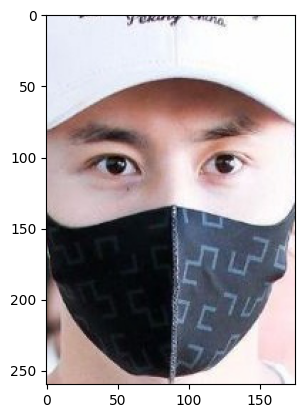

In [10]:
# Menampilkan orang bermasker
img = mpimg.imread('/content/drive/MyDrive/pcvk testing/omkar_gurav/with_mask/with_mask_945.jpg')
imgplot = plt.imshow(img)
plt.show()

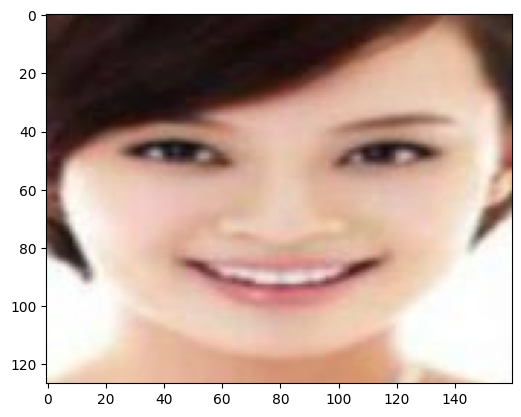

In [11]:
# Menampilkan orang tanpa masker
img = mpimg.imread('/content/drive/MyDrive/pcvk testing/omkar_gurav/without_mask/without_mask_3215.jpg')
imgplot = plt.imshow(img)
plt.show()

Image Processing

In [12]:
# Mengubah gambar menjadi array numpy

# 1. Input gambar
masker_path = '/content/drive/MyDrive/pcvk testing/omkar_gurav/with_mask/'
mask_file = os.listdir(masker_path)
# 2. Membuat variable kosong
data = []

# 3. Membuat perulangan untuk membaca semua gambar
for img_file in mask_file:

# file gambar dibaca menggunakan library dan membuka sebuah fungsi
  image = Image.open(masker_path + str(img_file))
# 4. Mengubah ukuran gambar menjadi 128
  image = image.resize((128,128))
# 5. Mengubah gambar menjadi RGB agar dapat diproses oleh neural network
  image = image.convert('RGB')
# 6. Mengubah object menjadi array numpy
  image = np.array(image)
  data.append(image)


#Mengulangi step diatas untuk gambar yang tidak bermasker
nonmasker_path = '/content/drive/MyDrive/pcvk testing/omkar_gurav/without_mask/'
nomask_files = os.listdir(nonmasker_path)

for img_file in nomask_files:


  image = Image.open(nonmasker_path + str(img_file))
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [13]:
# Menampilkan tipe data
type(data)

list

In [14]:
# Berisi jumlah total gambar
len(data)

7553

In [15]:
# Menampilkan value pixel dari data 0 (tidak bermasker)
data[0]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [16]:
# menampilkan tipe data(0)
type(data[0])

numpy.ndarray

In [17]:
# memeriksa tipe data 0
data[0].shape

(128, 128, 3)

In [18]:
# mengonversi list gambar dan list label menjadi array numpy

X = np.array(data)
Y = np.array(labels)

In [19]:
# memeriksa tipe dari section X
type(X)

numpy.ndarray

In [20]:
# memeriksa tipe dari section Y
type(Y)

numpy.ndarray

In [21]:
# mencetak shape dari kedua bagian
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [22]:
print(Y)

[1 1 1 ... 0 0 0]


Memisahkan data menjadi train dan test

In [23]:
# X untuk gambar array and Y untuk labels array
# Ambil 20% dari data sebagai data test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [24]:
# Mencetak shape original array
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [25]:
# scaling the data

X_train_scaled = X_train/255
X_test_scaled = X_test/255
X_train[0],X_train_scaled[0]

(array([[[134, 122, 122],
         [135, 123, 123],
         [134, 122, 122],
         ...,
         [170, 157, 140],
         [171, 158, 141],
         [172, 158, 142]],
 
        [[135, 123, 123],
         [136, 124, 124],
         [136, 124, 124],
         ...,
         [174, 161, 144],
         [174, 161, 144],
         [176, 162, 146]],
 
        [[136, 124, 124],
         [137, 125, 125],
         [137, 125, 125],
         ...,
         [177, 164, 147],
         [177, 164, 147],
         [177, 164, 147]],
 
        ...,
 
        [[167, 155, 155],
         [168, 156, 156],
         [167, 155, 155],
         ...,
         [ 94,  86,  75],
         [ 93,  83,  74],
         [ 92,  82,  73]],
 
        [[165, 153, 153],
         [166, 154, 154],
         [165, 153, 153],
         ...,
         [ 94,  86,  75],
         [ 93,  83,  74],
         [ 92,  82,  73]],
 
        [[163, 151, 151],
         [163, 151, 151],
         [163, 151, 151],
         ...,
         [ 93,  84,  74],
  

In [26]:
# X train sebelum scaling
X_train[0]

array([[[134, 122, 122],
        [135, 123, 123],
        [134, 122, 122],
        ...,
        [170, 157, 140],
        [171, 158, 141],
        [172, 158, 142]],

       [[135, 123, 123],
        [136, 124, 124],
        [136, 124, 124],
        ...,
        [174, 161, 144],
        [174, 161, 144],
        [176, 162, 146]],

       [[136, 124, 124],
        [137, 125, 125],
        [137, 125, 125],
        ...,
        [177, 164, 147],
        [177, 164, 147],
        [177, 164, 147]],

       ...,

       [[167, 155, 155],
        [168, 156, 156],
        [167, 155, 155],
        ...,
        [ 94,  86,  75],
        [ 93,  83,  74],
        [ 92,  82,  73]],

       [[165, 153, 153],
        [166, 154, 154],
        [165, 153, 153],
        ...,
        [ 94,  86,  75],
        [ 93,  83,  74],
        [ 92,  82,  73]],

       [[163, 151, 151],
        [163, 151, 151],
        [163, 151, 151],
        ...,
        [ 93,  84,  74],
        [ 93,  83,  74],
        [ 91,  81,  73]]

In [27]:
# X train setelah scaling
X_train_scaled[0]

array([[[0.5254902 , 0.47843137, 0.47843137],
        [0.52941176, 0.48235294, 0.48235294],
        [0.5254902 , 0.47843137, 0.47843137],
        ...,
        [0.66666667, 0.61568627, 0.54901961],
        [0.67058824, 0.61960784, 0.55294118],
        [0.6745098 , 0.61960784, 0.55686275]],

       [[0.52941176, 0.48235294, 0.48235294],
        [0.53333333, 0.48627451, 0.48627451],
        [0.53333333, 0.48627451, 0.48627451],
        ...,
        [0.68235294, 0.63137255, 0.56470588],
        [0.68235294, 0.63137255, 0.56470588],
        [0.69019608, 0.63529412, 0.57254902]],

       [[0.53333333, 0.48627451, 0.48627451],
        [0.5372549 , 0.49019608, 0.49019608],
        [0.5372549 , 0.49019608, 0.49019608],
        ...,
        [0.69411765, 0.64313725, 0.57647059],
        [0.69411765, 0.64313725, 0.57647059],
        [0.69411765, 0.64313725, 0.57647059]],

       ...,

       [[0.65490196, 0.60784314, 0.60784314],
        [0.65882353, 0.61176471, 0.61176471],
        [0.65490196, 0

Building a neural network

In [28]:
# Import tensorflow adalah Keras
# Temporflow library untuk membuild neural network
# Keras adalah wrapper dari library ini
import tensorflow as tf
from tensorflow import keras

In [29]:
# Membuat 2 kelas
num_of_classes = 2

# membuat variabel sebagai model
model = keras.Sequential()

# Menambahkan layer di neural network
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

# menambahkan flatten layer
model.add(keras.layers.Flatten())

# Menambahkan dense layer
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [30]:
# compile neural network
# Set algoritma pengoptimalan dan matriks function loss ke neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [31]:
# training neural network
# atur ke 5 ephocs karena tidak ada terlalu banyak dataset
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 166s 971ms/step - loss: 0.5085 - acc: 0.7833 - val_loss: 0.3288 - val_acc: 0.8711
Epoch 2/5
170/170 [==============================] - 171s 1s/step - loss: 0.2954 - acc: 0.8808 - val_loss: 0.2870 - val_acc: 0.8942
Epoch 3/5
170/170 [==============================] - 167s 983ms/step - loss: 0.2627 - acc: 0.8944 - val_loss: 0.2729 - val_acc: 0.8860
Epoch 4/5
170/170 [==============================] - 164s 966ms/step - loss: 0.2229 - acc: 0.9125 - val_loss: 0.2718 - val_acc: 0.8876
Epoch 5/5
170/170 [==============================] - 163s 961ms/step - loss: 0.1786 - acc: 0.9292 - val_loss: 0.2588 - val_acc: 0.9107


Model Evaluation

In [32]:
# Menampilkan akurasi
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Tes Akurasi =', accuracy)

48/48 [==============================] - 11s 225ms/step - loss: 0.2301 - acc: 0.9120
Tes Akurasi = 0.9119788408279419


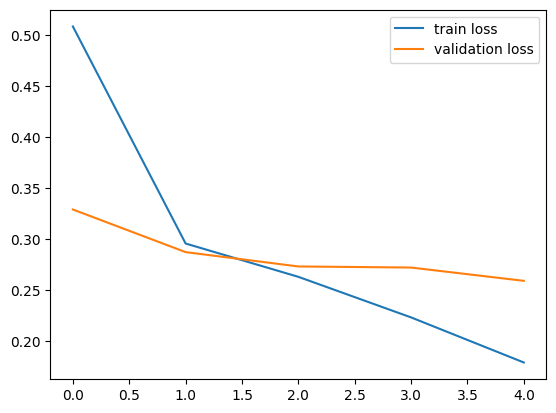

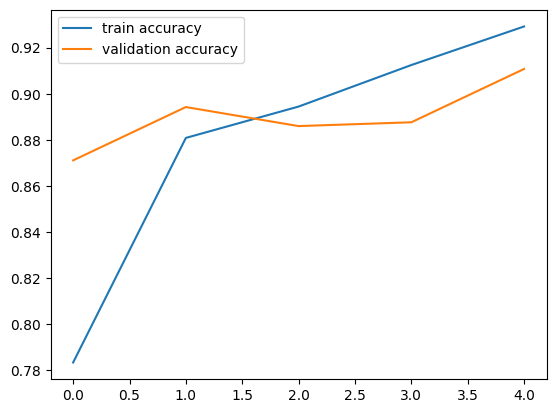

In [33]:
h = history

# plot nilai kegagalan
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot nilai akurasi
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Build an predictive system

Masukkan path gambar yang akan di periksa: /content/drive/MyDrive/pcvk testing/omkar_gurav/with_mask/with_mask_146.jpg


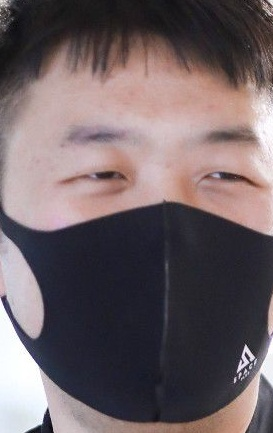

1/1 [==============================] - 0s 31ms/step
[[0.44729373 0.55612594]]
1
Orang di gambar tersebut menggunakan masker


In [47]:
import cv2

from google.colab.patches import cv2_imshow

# Mengambil path gambar and Menampilkan prediksi path
input_image_path = input('Masukkan path gambar yang akan di periksa: ')

# Membaca gambar dari path
input_image = cv2.imread(input_image_path)

# Menampilkan gambar
cv2_imshow(input_image)

# Mengubah ukuran gambar yang diinput
input_image_resized = cv2.resize(input_image, (128,128))

# Scale inputan gambar
input_image_scaled = input_image_resized/255

# Mereshape gambar yang diinput
input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

# prediksi gambar input
input_prediction = model.predict(input_image_reshaped)

# mencetak prediksi label
print(input_prediction)


# Meginputkan prekdiksi label
input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('Orang di gambar tersebut menggunakan masker')

else:

  print('Orang di gambar tersebut tidak menggunakan masker')

Masukkan path gambar yang akan di periksa: /content/drive/MyDrive/pcvk testing/omkar_gurav/without_mask/without_mask_1032.jpg


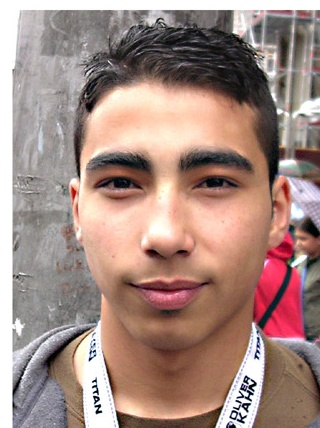

1/1 [==============================] - 0s 41ms/step
[[0.5245794  0.35091367]]
0
Orang di gambar tersebut tidak menggunakan masker


In [39]:
import cv2

from google.colab.patches import cv2_imshow

# Mengambil path gambar and Menampilkan prediksi path
input_image_path = input('Masukkan path gambar yang akan di periksa: ')

# Membaca gambar dari path
input_image = cv2.imread(input_image_path)

# Menampilkan gambar
cv2_imshow(input_image)

# Mengubah ukuran gambar yang diinput
input_image_resized = cv2.resize(input_image, (128,128))

# Scale inputan gambar
input_image_scaled = input_image_resized/255

# Mereshape gambar yang diinput
input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

# prediksi gambar input
input_prediction = model.predict(input_image_reshaped)

# mencetak prediksi label
print(input_prediction)


# Meginputkan prekdiksi label
input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('Orang di gambar tersebut menggunakan masker')

else:

  print('Orang di gambar tersebut tidak menggunakan masker')